In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from Loader import Loader
import Constants as C
from Cuts import qlayerCut, firstHitInOuter, maxDistMaxDoms, balloonCut

In [10]:
# Load the 2014 burn sample
basesel = C.basesel
basesel += '&&(ImpLF_rchi2>80&&tlarge5[0]-tearly5[0] < 200)'

load = Loader(basesel)
data = load.load(fname=C.BS2014)
data = qlayerCut(data,False,0.8)
data = balloonCut(data)
data['maxDist'] = maxDistMaxDoms(data)

In [12]:
# Add weights
data['w'] = pd.Series(np.ones(len(data),dtype=int),index=data.index)

In [13]:
# Set the features to be used in training
b_features = C.bdt_features


In [14]:
# Load the model
clf = joblib.load('../models/bdt_hyperparamopt_cleaningupdate.pkl')

In [6]:
#data = data[ data.hs_cogz > - 450 ]

In [15]:
# score the data
data['scores'] = pd.Series(clf.decision_function(data[b_features]),index=data.index)

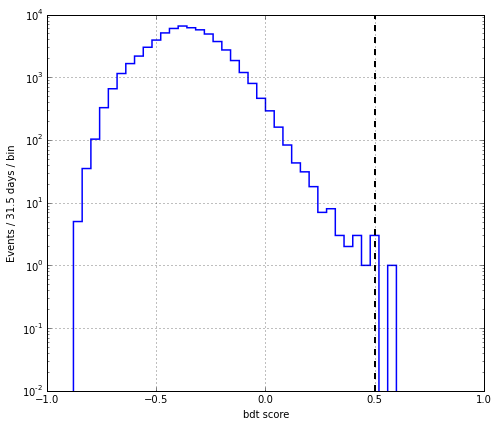

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1,figsize=(7,6))
data.scores.hist(weights=data['w'].as_matrix(),
                range=(-1,1),
                bins=50,
                histtype='step',
                lw=1.5)
plt.plot([0.5,0.5],[1e-2,1e4],lw=2,color='black',ls='dashed')
plt.xlabel('bdt score')
plt.ylabel('Events / 31.5 days / bin')
ax.set_yscale('log')
plt.tight_layout()
#plt.savefig('../plots/mvaana_ballooncuts/bs2014/bdtscore.png')


In [22]:
# Ok look at the final event guys
peal = data[ data['scores'] > 0.5 ]
peal[['runid','evtid','log10(hs_q_tot_pulses)','scores','hs_cogz','hs_z_travel','rho_travel5','ndoms_5pe','nstr_2ndway_5pe','cumuAt600ns']]

#evts = peal['evtid'].as_matrix()
#runs = peal['runid'].as_matrix()
#outfile = open('bs2014_inSR.txt','w')
#for i in range(len(evts)):
#    outfile.write(str(runs[i])+" "+str(evts[i])+"\n")
#outfile.close()

,runid,evtid,log10(hs_q_tot_pulses),scores,hs_cogz,hs_z_travel,rho_travel5,ndoms_5pe,nstr_2ndway_5pe,cumuAt600ns
36644,123270,39890447,4.293756,0.592957,-448.584997,2.927300,190.000540,152,18,0.808098
91194,125220,59431277,3.682808,0.515526,-3.145021,42.733214,70.619877,29,4,0.957967


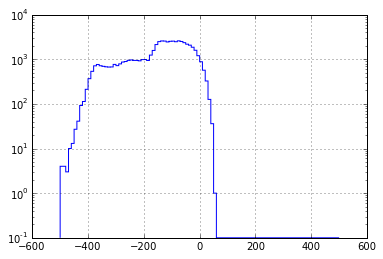

In [18]:
data.hs_z_travel.hist(range=(-500,500),bins=100,histtype='step',log=True)